In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection,preprocessing,linear_model,metrics,neighbors
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
glass_data = pd.read_csv('glass.csv')

In [4]:
glass_data.shape

(214, 10)

In [7]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
X = glass_data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y = glass_data['Type']

In [15]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=4)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 9)
(71, 9)
(143,)
(71,)


In [17]:
'''
using knn model at different values of k 
'''
krange = range(1,26)
scores = {}
scoresList = []

for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,prediction)
    scoresList.append(metrics.accuracy_score(y_test,prediction))


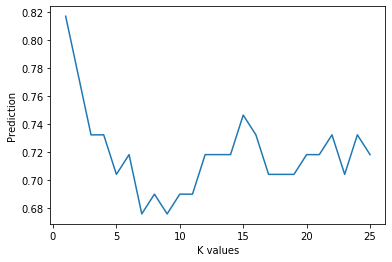

In [19]:
plt.plot(krange,scoresList)
plt.xlabel('K values')
plt.ylabel('Prediction')
plt.show()